In [3]:
!pip install plotly
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     -------------------------------------  163.8/167.0 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.1/7.8 MB 34.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.8 MB 25.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.7/7.8 MB 29.7 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 29.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6.7/7.8 MB 30.3 MB/s eta 0:00:01
   ---------------------------------------  7.8/7.8 MB 31.3 MB/s eta 0:00:01
   ---------------------------------------  7.8/7.8 MB 31.3 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 23.8 MB/s eta 0:00:00
   -----

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("F1DriversDataset.csv")
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


In [6]:
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [7]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

# Q1: How does the number of seasons a driver compete in relate to their total race wins?

In [8]:
df_winsvsyears = df[['Years_Active','Race_Wins']]
df_winsvsyears.head()

,Years_Active,Race_Wins
0,2,0.0
1,2,0.0
2,2,0.0
3,5,0.0
4,1,0.0


In [9]:
df_winsvsyears.isnull().sum()

Years_Active    0
Race_Wins       0
dtype: int64

In [10]:
X= df_winsvsyears['Years_Active'].to_numpy().reshape(-1,1)
y = df_winsvsyears['Race_Wins'].to_numpy().reshape(-1,1).ravel()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=None)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [12]:
corr_coef = df['Years_Active'].corr(df['Race_Wins'])
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("corr coef",corr_coef)

Mean Squared Error:  22.455824591226435
corr coef 0.5037167768266376


In [14]:
# Primary Question 1: How does the number of seasons a driver competes in relate to their total race wins?
corr_seasons_wins = df['Years_Active'].corr(df['Race_Wins'])

Text(0, 0.5, 'Number of Wins')

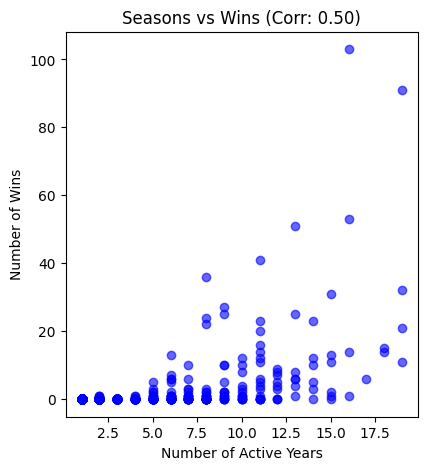

In [16]:
plt.figure(figsize=(10, 5))

# Plot 1: Correlation between Seasons and Wins
plt.subplot(1, 2, 1)
plt.scatter(df['Years_Active'], df['Race_Wins'], alpha=0.6, color='blue')
plt.title(f"Seasons vs Wins (Corr: {corr_seasons_wins:.2f})")
plt.xlabel('Number of Active Years')
plt.ylabel('Number of Wins')

There most likely are other factors involved other than the number of years of experience contributing to a driver's success in Formula 1.

The correlation coefficient is 0.50, indicating a moderate positive correlation. Drivers who participate in more seasons tend to have more race wins.

# Q2: How is the number of championships won compare to the number of seasons competed in? 

In [17]:
df_champsvsyears = df[['Years_Active','Championships']]
df_champsvsyears.head()

,Years_Active,Championships
0,2,0.0
1,2,0.0
2,2,0.0
3,5,0.0
4,1,0.0


In [18]:
df_champsvsyears.isnull().sum()

Years_Active     0
Championships    0
dtype: int64

In [19]:
corr_seasons_championships = df['Years_Active'].corr(df['Championships'])
print(f"Correlation between Seasons and Championships: {corr_seasons_championships:.2f}")

Correlation between Seasons and Championships: 0.42


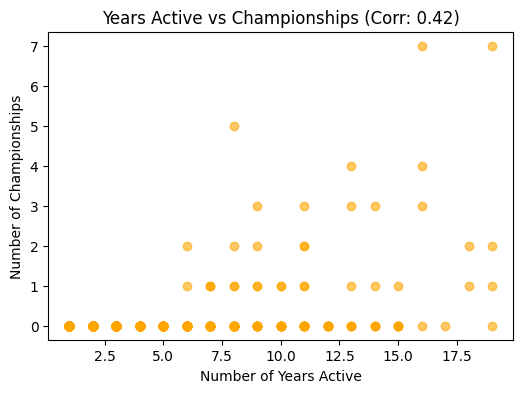

In [20]:
# Scatter plot for Seasons vs Championships
plt.figure(figsize=(6, 4))
plt.scatter(df['Years_Active'], df['Championships'], alpha=0.6, color='orange')
plt.title(f"Years Active vs Championships (Corr: {corr_seasons_championships:.2f})")
plt.xlabel('Number of Years Active')
plt.ylabel('Number of Championships')
plt.show()

The correlation is 0.42, indicating a moderate relationship between the number of seasons a driver participates in and their championships won.

# Q3: Does the decade a driver participates in affect their average win rate relative to their number of race starts?

This is an interesting question as it considers historical changes in Formula 1, such as improvements in car technology, team dominance, or driver strategies. It asks whether drivers from different decades have been more or less successful in terms of converting race starts into wins.

In [21]:
decade_group = df.groupby('Decade').agg({
    'Win_Rate': 'mean',
    'Race_Starts': 'mean'
}).reset_index()

In [22]:
decade_group['Win_Rate_Per_Start'] = decade_group['Win_Rate'] / decade_group['Race_Starts']
print(decade_group)

   Decade  Win_Rate  Race_Starts  Win_Rate_Per_Start
0    1950  0.013459     4.743455            0.002837
1    1960  0.007078     8.631356            0.000820
2    1970  0.009794    21.029412            0.000466
3    1980  0.010657    34.213115            0.000311
4    1990  0.009494    47.277108            0.000201
5    2000  0.018616    75.340000            0.000247
6    2010  0.019746    89.723404            0.000220
7    2020  0.010932    77.540541            0.000141


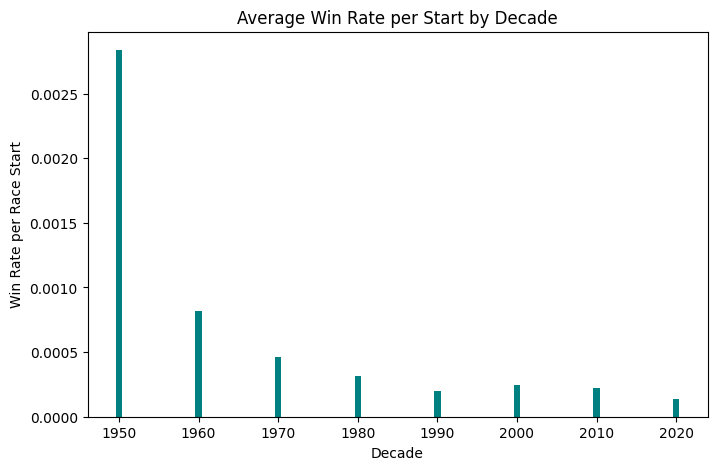

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(decade_group['Decade'], decade_group['Win_Rate_Per_Start'], color='teal')
plt.title('Average Win Rate per Start by Decade')
plt.xlabel('Decade')
plt.ylabel('Win Rate per Race Start')
plt.xticks(decade_group['Decade'])  # Ensure all decades are labeled
plt.show()

# Q4: How is the number of podium finishes relate to the number of pole positions for drivers who have been champions?

In [24]:
df_champions = df.query('Championships > 0')
df_champions.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,"[2005, 2006]",2010,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19,True
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,[1978],1980,0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14,True
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,"[1952, 1953]",1950,0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6,True
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,[2009],2010,0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18,True


In [25]:
df_champions.isnull().sum()

Driver                0
Nationality           0
Seasons               0
Championships         0
Race_Entries          0
Race_Starts           0
Pole_Positions        0
Race_Wins             0
Podiums               0
Fastest_Laps          0
Points                0
Active                0
Championship Years    0
Decade                0
Pole_Rate             0
Start_Rate            0
Win_Rate              0
Podium_Rate           0
FastLap_Rate          0
Points_Per_Entry      0
Years_Active          0
Champion              0
dtype: int64

In [26]:
from sklearn.metrics import mean_squared_error
def linear_regression(df, predictor, target):
    
    # to fit a linear regression model to the data
    X = df[predictor].values.reshape(-1,1)
    y = df[target].values.reshape(-1,1)
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    # Calculate the R-squared value of the linear regression model
    r_squared = regressor.score(X, y)
    
    # Calculate the correlation coefficient 
    corr_coef = df[predictor].corr(df[target])
    
    # Predict the target variable using the predictor variable
    y_pred = regressor.predict(X)
    
    # Calculate the prediction score
    prediction_score = mean_squared_error(y, y_pred)
    
    # Create a scatter plot to visualize the relationship between the predictor and target
    fig = sns.lmplot(x=predictor,y=target,data=df)
    
    # Plot the regression line on top of the scatter plot
    plt.plot(df[predictor], regressor.predict(df[[predictor]]), color='red')
    plt.title('Race Wins vs Pole Positions')
    return corr_coef, r_squared, y_pred, prediction_score, fig

prediction_score 68.33930367927572
correlation coefficient 0.9280326627611925
R-squared: 0.8612446231516298


C:\Users\monti\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


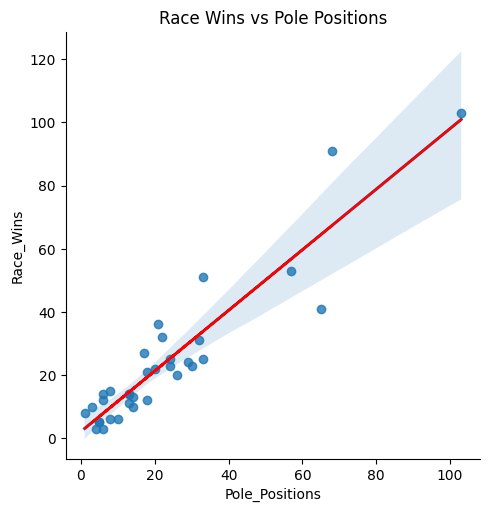

In [27]:
corr_coef, r_squared, y_pred, prediction_score, fig = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')


print('prediction_score', prediction_score)
print('correlation coefficient', corr_coef)
print('R-squared:', r_squared)

Securing pole position is a strong indicator of race victories for champions, with higher pole positions typically correlating with a greater number of wins.